In [3]:
import re
import json
import numpy as np
import pandas as pd
import numpy as np
from random import shuffle
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

In [4]:
grading_input =json.loads(open('grading.input.json','r').read())
df_grading = pd.io.json.json_normalize(grading_input)

In [5]:
test_input =json.loads(open('test.input.json','r').read())
df_test = pd.io.json.json_normalize(test_input)
df_test['writing'] =  pd.Series(open('test.output','r').read().split('\n'))

In [6]:
train_data =json.loads(open('train_data.json','r').read())
df = pd.io.json.json_normalize(train_data)

In [7]:
exact_dic = {
    '=<언론사명>\)': '!!특성1!!',
    '\[cbs':'!!특성2!!',
    ' = ':'뉴시스',
    '【 앵커멘트 】':'MBN',
    '\[<언론사명> 글:':'오마이뉴스',
    '<앵커 멘트>':'KBS 뉴스',
    '\[헤럴드포토\]':'헤럴드경제',
    '\[<언론사명>=이슈섹션\]':'헤럴드경제',
    '중계 화면 캡처':'헤럴드경제',
    '\[<언론사명>\]':"['동아일보','서울신문','헤럴드경제']",
    '\[앵커\]':'JTBC와 기타들',
    '\n\n\n\n\n':'ㄴㄴㄴ',
    '\[<언론사명> \]':'dsas',
    '\]':'sadsa',
    '◆':'asda',
    '▲':'das',
    '■':'sadsas',
    '<언론사명>':'sadljk'
}

In [8]:
imp_feature_dic = {x: '주요특성'+str(i+1) for i, x in enumerate(list(exact_dic.keys()))}

In [9]:
def find_feature(x):
    for word, feat in imp_feature_dic.items():
        x = re.sub(word,' '+feat+' ',x)
    return x

def clean_blank(x):
    try:
        return list(x.remove(''))
    except:
        return x

In [10]:
test_with_features = df.text.map(lambda x: find_feature(x))
text_cleaning = test_with_features.map(lambda x: list(set(re.sub('[\[\]\(\)\"\'\n\.<>\,\!\?=\“]',' ',x).split(' '))))
text_cleaning.map(lambda x: clean_blank(x))

0        [전, 500만원을, 1300만원이, 벌어지고, 요구서, 갑자기, 분인데, 시청자,...
1        [내세웠다, 여권, 청와대, 청와대나, 돼야, ‘박, 관련, 후보, 소속, 핵심, ...
2        [혼란이, 이어, 고용복지플러스센터를, 양질의, 믿고, 멀다, 엄마들, 고령사회, ...
3        [주요특성13, 1997년, 때, 단, 친박연대를, 탈당해서, 한나라당, 탈당해, ...
4        [결번이, 이어, 사실상, 나타났다, 46명, 이라고, 결번인, 이들, 명부가, 상...
5        [주권, 그로부터, 명문화, 불구하고, 전, 방지를, 위기가, 개최한, 제도화하고,...
6        [여야, 사회간접자본, 두달을, 400조, 4, 민주당, 주광덕, 야권의, 이, 발...
7        [전, 신청할, 제명, 하겠다고, 현행, 새누, 출마설이, 원서를, 또는, 해당, ...
8        [불구하고, 전, 신임, 다음, 공석인, 긴급, 군, 이라고, 4, 공정하고, 탄핵...
9        [전, 무소속, 이라고, 분량의, 간부급, 아닌, 퇴비, 자신을, 있어, 많은, 이...
10       [전, 찾은, 경기도, 동아시아미래재단, 회견을, 것과는, 국민을, 애절한, 봉사하...
11       [선수의, 여러분이, 새로운, 이겨내고, 에너지가, 선수단장, 등, 강영중, 박인비...
12       [전, 벌어졌다, 이어, 청장에게, 요건을, 이라고, 받아들여지지, 내렸다, 갖춰야...
13       [전, 이어, 더듬어, 심혈을, 기울여, 주요특성13, ‘동진침장’이, 정황이, 놓...
14       [제동20대, 야권으로, 불투명하고, 무소속, 체제를, 신혼부부들에게, 임동원, 자...
15       [중소기업들의, 투자, 살리기에, 결의가, 달하는, 자리, 거주, 해외, 각국이, ...
16       [lg, 참여해, 계획이다, 시장상황, 방법, 해외, 품질이, 강화를, 강화해, 예.

In [12]:
# corpus_text_all = [y for x in text_cleaning for y in x]
# corpus_text_cleaning = list(set([y for x in text_cleaning for y in x]))

# print(len(corpus_text_cleaning))
# print(len(corpus_text_all))

# corpus_frequency =  {word: 0 for word in corpus_text_cleaning}

# for x in corpus_text_all:
#     corpus_frequency[x]+=1

# df_frequency = pd.DataFrame.from_dict(corpus_frequency, orient='index')
# df_frequency_ri = df_frequency.reset_index()

1067646
14077325


In [11]:
corpus_text_all = [y for x in text_cleaning for y in x]
corpus_text_cleaning = list(set([y for x in text_cleaning for y in x]))

print(len(corpus_text_cleaning))
print(len(corpus_text_all))

corpus_frequency =  {word: 0 for word in corpus_text_cleaning}

for x in corpus_text_all:
    corpus_frequency[x]+=1

df_frequency = pd.DataFrame.from_dict(corpus_frequency, orient='index')
df_frequency_ri = df_frequency.reset_index()

1046149
14052542


In [12]:
corpus_up = df_frequency[df_frequency[0]>50].reset_index()['index']

In [13]:
len(corpus_up)

30451

In [14]:
corpus_word_to_id = {x: i for i, x in enumerate(list(corpus_up))}
corpus_id_to_word = {i: x for i, x in enumerate(list(corpus_up))}

In [15]:
# 신문사 ID_dic 
yid_dict = {y: x for x,y in enumerate(list(set(df.writing)))}

In [22]:
max_features = len(corpus_up)
text_max_words = 300

In [23]:
def data_to_wordvec(df):
    test_with_features = df.text.map(lambda x: find_feature(x))
    text_cleaning = test_with_features.map(lambda x: list(set(re.sub('[\[\]\(\)\"\'\n\.<>\,\!\?=\“]',' ',x).split(' '))))
    text_cleaning.map(lambda x: clean_blank(x))
    
    x_train_text_id = text_cleaning.map(lambda x: list(map(lambda word: corpus_word_to_id.get(word),x)))
    x_train_text_id = x_train_text_id.map(lambda x: list(filter(None, x)))
    x_train = sequence.pad_sequences(x_train_text_id.as_matrix(), maxlen=text_max_words)
    return x_train
    
def data_to_writingvec(df):
    y_train  = df.writing.map(lambda x: yid_dict[x]).as_matrix()
    return np_utils.to_categorical(y_train)

In [24]:
x_train = data_to_wordvec(df)
x_test = data_to_wordvec(df_test)

In [25]:
y_train = data_to_writingvec(df)
y_test = data_to_writingvec(df_test)

In [26]:
model2 = Sequential()
model2.add(Embedding(max_features, 512, input_length=text_max_words))
model2.add(Dropout(0.2))
model2.add(Conv1D(1024,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(19, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
hist = model2.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=[x_test, y_test])

Train on 76500 samples, validate on 4500 samples
Epoch 1/5
76500/76500 [==============================] - 1211s 16ms/step - loss: 0.7743 - acc: 0.7335 - val_loss: 0.4788 - val_acc: 0.8291
Epoch 2/5
76500/76500 [==============================] - 1211s 16ms/step - loss: 0.3330 - acc: 0.8850 - val_loss: 0.4280 - val_acc: 0.8589
Epoch 3/5
76500/76500 [==============================] - 1211s 16ms/step - loss: 0.1587 - acc: 0.9482 - val_loss: 0.5373 - val_acc: 0.8533
Epoch 4/5
 4992/76500 [>.............................] - ETA: 18:29 - loss: 0.0848 - acc: 0.9744

KeyboardInterrupt: 

In [32]:
model = Sequential()
model.add(Embedding(max_features, 256, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(512,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
hist = model.fit(x_train, y_train, epochs=3, batch_size=256, validation_data=[x_test, y_test])

Train on 76500 samples, validate on 4500 samples
Epoch 1/3
76500/76500 [==============================] - 489s 6ms/step - loss: 0.8365 - acc: 0.7182 - val_loss: 0.4434 - val_acc: 0.8338
Epoch 2/3
76500/76500 [==============================] - 484s 6ms/step - loss: 0.3452 - acc: 0.8807 - val_loss: 0.3969 - val_acc: 0.8604
Epoch 3/3
76500/76500 [==============================] - 483s 6ms/step - loss: 0.1555 - acc: 0.9496 - val_loss: 0.4892 - val_acc: 0.8544


In [ ]:
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D

In [21]:
model2 = Sequential()
model2.add(Embedding(max_features, 256, input_length=text_max_words))
model2.add(Dropout(0.2))
model2.add(Conv1D(512,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(19, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
hist = model2.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=[x_test, y_test])

Train on 76500 samples, validate on 4500 samples
Epoch 1/5
76500/76500 [==============================] - 486s 6ms/step - loss: 0.8396 - acc: 0.7170 - val_loss: 0.4491 - val_acc: 0.8384
Epoch 2/5
76500/76500 [==============================] - 481s 6ms/step - loss: 0.3496 - acc: 0.8790 - val_loss: 0.4154 - val_acc: 0.8611
Epoch 3/5
76500/76500 [==============================] - 482s 6ms/step - loss: 0.1571 - acc: 0.9493 - val_loss: 0.4723 - val_acc: 0.8638
Epoch 4/5
76500/76500 [==============================] - 483s 6ms/step - loss: 0.0619 - acc: 0.9802 - val_loss: 0.5998 - val_acc: 0.8629
Epoch 5/5
76500/76500 [==============================] - 485s 6ms/step - loss: 0.0372 - acc: 0.9885 - val_loss: 0.6499 - val_acc: 0.8587


In [65]:
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D

In [67]:
model3 = Sequential()
model3.add(Embedding(max_features, 256, input_length=text_max_words))
model3.add(Dropout(0.2))
model3.add(Conv1D(512,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model3.add(MaxPooling1D(pool_size=4))
model3.add(LSTM(128))
model3.add(Dense(19, activation='softmax'))

# 3. 모델 학습과정 설정하기
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
hist = model3.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=[x_test, y_test])

Train on 76500 samples, validate on 4500 samples
Epoch 1/5
76500/76500 [==============================] - 385s 5ms/step - loss: 0.9005 - acc: 0.6882 - val_loss: 0.5394 - val_acc: 0.8100
Epoch 2/5
76500/76500 [==============================] - 378s 5ms/step - loss: 0.3792 - acc: 0.8715 - val_loss: 0.4674 - val_acc: 0.8451
Epoch 3/5
76500/76500 [==============================] - 380s 5ms/step - loss: 0.2244 - acc: 0.9270 - val_loss: 0.4932 - val_acc: 0.8444
Epoch 4/5
76500/76500 [==============================] - 379s 5ms/step - loss: 0.1335 - acc: 0.9580 - val_loss: 0.5789 - val_acc: 0.8398
Epoch 5/5
76500/76500 [==============================] - 379s 5ms/step - loss: 0.0751 - acc: 0.9768 - val_loss: 0.6530 - val_acc: 0.8440


In [69]:
hist = model3.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=[x_test, y_test])

Train on 76500 samples, validate on 4500 samples
Epoch 1/5
76500/76500 [==============================] - 377s 5ms/step - loss: 0.0512 - acc: 0.9845 - val_loss: 0.6623 - val_acc: 0.8429
Epoch 2/5
76500/76500 [==============================] - 380s 5ms/step - loss: 0.0356 - acc: 0.9897 - val_loss: 0.7215 - val_acc: 0.8491
Epoch 3/5
76500/76500 [==============================] - 378s 5ms/step - loss: 0.0333 - acc: 0.9898 - val_loss: 0.7492 - val_acc: 0.8431
Epoch 4/5
76500/76500 [==============================] - 375s 5ms/step - loss: 0.0282 - acc: 0.9914 - val_loss: 0.8351 - val_acc: 0.8347
Epoch 5/5
76500/76500 [==============================] - 378s 5ms/step - loss: 0.0238 - acc: 0.9931 - val_loss: 0.8150 - val_acc: 0.8338


In [28]:
id_to_writing = {x: y for x,y in enumerate(list(set(df.writing)))}

In [29]:
def t_second(x):
    return x[1]

def get_writing_list(ex_list):
    ex_list2 = [(index, value) for index, value in enumerate(ex_list)]
    ex_list2.sort(key=t_second, reverse=True)
    
    return list(map(lambda x: id_to_writing[x[0]], ex_list2))

In [30]:
loss_acc = model2.evaluate(x_test, y_test)

4500/4500 [==============================] - 16s 4ms/step


In [31]:
loss_acc

[0.53400444699658289, 0.86200000010596378]

In [42]:
x_grading = data_to_wordvec(df_grading)

In [43]:
x_predict = model2.predict(x_grading)

In [44]:
final_result = list(map(lambda x: get_writing_list(x),x_predict))

In [45]:
pd.Series(final_result).map(lambda x: ','.join(x)).to_csv('submission.txt',index=False, header=False)

In [32]:
x_predict2 = model2.predict(x_test)

In [33]:
final_result2 = list(map(lambda x: get_writing_list(x),x_predict2))

In [34]:
df_test['result'] = pd.Series(final_result2)

In [35]:
df_test.head()

,datetime,text,writing,result
0,20160901,"日, 위안부지원금 송금완료…'소녀상 압박' 우려(cg)[<언론사명>tv 제공]\n\...",연합뉴스,"[연합뉴스, 연합뉴스TV, 매일경제, MBN, 뉴시스, 헤럴드경제, 아시아경제, T..."
1,20160918,"새누리 ""안보와 안전, 민생이 최우선"" 더민주 ""박 대통령이 먼저 변해야"" 국민의당...",뉴시스,"[뉴시스, 국민일보, 연합뉴스, 파이낸셜뉴스, KBS 뉴스, 아시아경제, 매일경제,..."
2,20160609,"""사실과 다르다"" 국민의당, '김수민 리베이트 의혹' 정면 반박국민의당 김수민/사진...",MBN,"[MBN, 국민일보, 매일경제, YTN, 경향신문, TV조선, KBS 뉴스, 파이낸..."
3,20160101,[<언론사명>]본보-r&r; 총선의 해 여론조사“신인 선택” 31%〉“현역” 24%...,동아일보,"[서울신문, 헤럴드경제, 동아일보, 경향신문, 국민일보, 매일경제, MBN, 아시아..."
4,20160307,"김종인 더민주 대표는 자신이 던진 담뱃불이 어떻게 번지는 지, 느긋하게 즐기는 모습...",채널A,"[채널A, 동아일보, TV조선, YTN, 헤럴드경제, 서울신문, 아시아경제, KBS..."


In [39]:
df_test['score'] = pd.Series(score)

In [40]:
df_test.groupby('score').size()

score
0.00     130
0.33     177
0.50     314
1.00    3879
dtype: int64

In [41]:
df_test.groupby('score').get_group(0).groupby('writing').get_group('KBS 뉴스')

,datetime,text,writing,result,score
76,20160706,'김정은의 금고지기'로 알려졌던 한광상(59) 인민군 소장이 중장으로 진급한 사실이...,KBS 뉴스,"[국민일보, 매일경제, 경향신문, MBN, 파이낸셜뉴스, 헤럴드경제, 뉴시스, KB...",0.0
573,20160706,국회는 6일(오늘) 오후 본회의를 열어 정치발전특별위원회 등 7개 특위의 구성결의안...,KBS 뉴스,"[파이낸셜뉴스, 매일경제, 국민일보, KBS 뉴스, 뉴시스, 경향신문, 헤럴드경제,...",0.0
581,20161222,"고등학교, 대학교 동문인 황교안 대통령 권한대행 국무총리와 새누리당 정우택 신임 원...",KBS 뉴스,"[매일경제, 국민일보, 경향신문, 파이낸셜뉴스, 헤럴드경제, MBN, KBS 뉴스,...",0.0
823,20161026,윤전추 청와대 행정관이 언론에 보도된 동영상에서 최순실의 지시를 받아 옷과 서류를 ...,KBS 뉴스,"[국민일보, 경향신문, 매일경제, MBN, 헤럴드경제, 파이낸셜뉴스, 뉴시스, KB...",0.0
1138,20161124,새누리당의 여론지지율이 처음으로 3위로 내려앉은 것으로 나타났다고 여론조사 전문업체...,KBS 뉴스,"[매일경제, 파이낸셜뉴스, 경향신문, 국민일보, 헤럴드경제, KBS 뉴스, MBN,...",0.0
1634,20161219,박근혜 대통령이 한나라당 대표를 맡고 있던 지난 2005년 7월 김정일 당시 북한 ...,KBS 뉴스,"[MBN, 국민일보, 동아일보, TV조선, 경향신문, YTN, 매일경제, 아시아경제...",0.0
1904,20160603,"더불어민주당의 전국 지역위원장 공모에 총 364명이 신청했으며, 참패한 호남과 세종...",KBS 뉴스,"[경향신문, 국민일보, 매일경제, 파이낸셜뉴스, KBS 뉴스, MBN, 헤럴드경제,...",0.0
2470,20161220,새누리당 친박 주류 모임인 '혁신과 통합 보수연합'이 20일 해산을 선언했다. 친...,KBS 뉴스,"[파이낸셜뉴스, 매일경제, 국민일보, KBS 뉴스, 경향신문, MBN, 헤럴드경제,...",0.0
2505,20160708,"사드의 작동 원리를 살펴보겠습니다. 북한이 탄도미사일을 발사하면, 요격 미사일이 공...",KBS 뉴스,"[MBN, 국민일보, YTN, KBS 뉴스, TV조선, 매일경제, 뉴시스, 연합뉴스...",0.0
2770,20160928,올들어 이산가족 신청자 가운데 생존자수가 절반 이하로 떨어졌으며 생존자의 평균 연령...,KBS 뉴스,"[국민일보, 경향신문, 매일경제, 파이낸셜뉴스, 헤럴드경제, 뉴시스, MBN, KB...",0.0


In [56]:
df_test.groupby('score').get_group(0.33).groupby('writing').size().sort_values(ascending=False)

writing
동아일보      29
서울신문      29
국민일보      24
매일경제      24
경향신문      13
헤럴드경제     12
파이낸셜뉴스    11
KBS 뉴스    10
연합뉴스TV     7
MBN        6
YTN        4
JTBC       3
노컷뉴스       2
오마이뉴스      2
아시아경제      1
연합뉴스       1
뉴시스        1
dtype: int64

In [37]:
score = []
for index, row in df_test.iterrows():
    if row['writing'] == row['result'][0]:
        score.append(1)
    elif row['writing'] == row['result'][1]:
        score.append(0.5)
    elif row['writing'] == row['result'][2]:
        score.append(0.33)
    else:
        score.append(0)

In [38]:
sum(score) / len(score)

0.909868888888887

In [36]:
sum(score) / len(score)

0.9057933333333313

In [30]:
sum(score) / len(score)

0.9058755555555538

In [39]:
sum(score) / len(score)

0.9066088888888869

In [60]:
%matplotlib inline

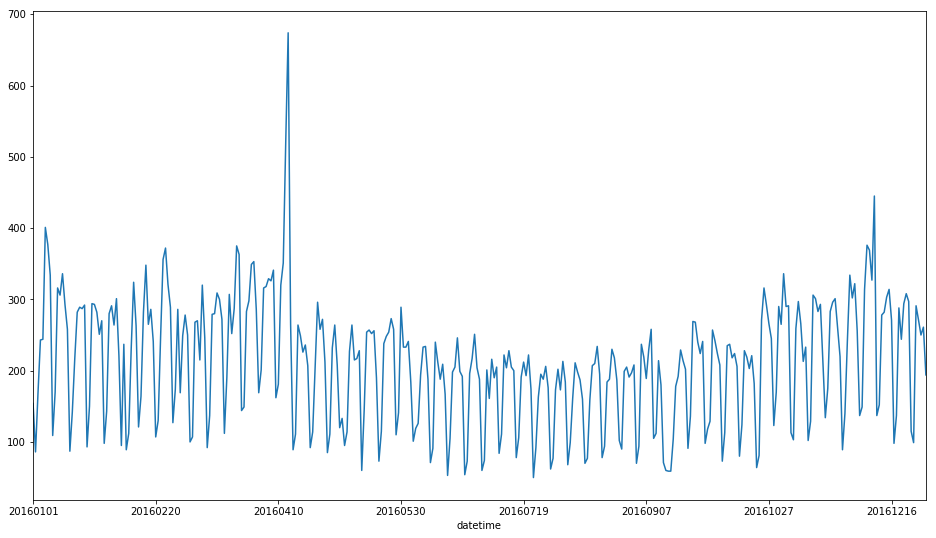

In [61]:
df.groupby('datetime').size().plot(figsize=(16,9))

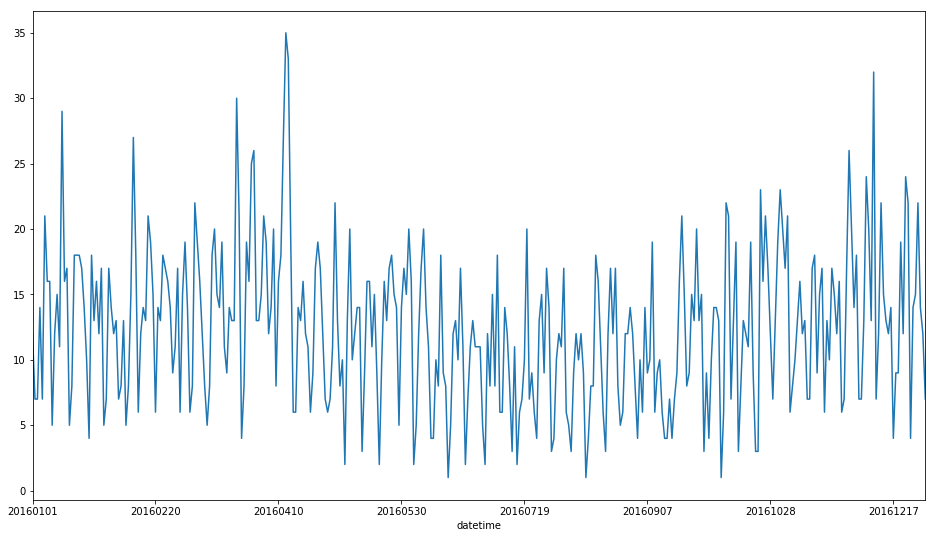

In [62]:
df_test.groupby('datetime').size().plot(figsize=(16,9))

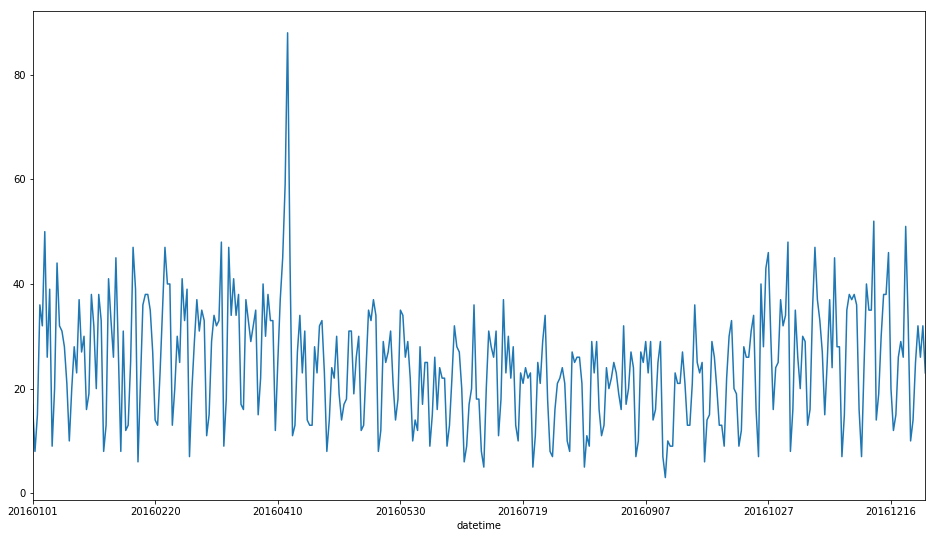

In [63]:
df_grading.groupby('datetime').size().plot(figsize=(16,9))